# 군집화 - 와인 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 와인 데이터 차원 축소

In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [4]:
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
wine_pca = PCA(n_components=2).fit_transform(wine_std)

In [5]:
df = pd.DataFrame(wine_pca, columns=['PC1','PC2'])
df['target'] = wine.target
df.head(3)

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0


- 군집화

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(wine_std)

KMeans(n_clusters=3, random_state=2021)

In [7]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [8]:
df['cluster'] = kmeans.labels_
df.tail(3)

,PC1,PC2,target,cluster
175,-2.677839,-2.760899,2,2
176,-2.387017,-2.297347,2,2
177,-3.208758,-2.768920,2,2


In [9]:
df.groupby(['target','cluster']).count()

PC1  PC2
target cluster          
0      0         59   59
1      0          3    3
       1         65   65
       2          3    3
2      2         48   48

- 데이터 시각화

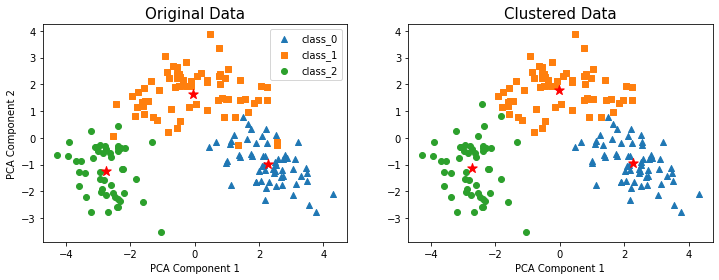

In [16]:
markers = ['^','s','o']

_, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        ax.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
        ax.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100)

    if column == 'target':
        ax.legend()
        ax.set_title('Original Data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
    else:
        ax.set_title('Clustered Data', fontsize=15)

    ax.set_xlabel('PCA Component 1')
plt.show()